# Классификация цветов Ириса 🌸

## Введение

В этом ноутбуке мы познакомимся с задачей **классификации** - одной из основных задач машинного обучения. Классификация - это определение, к какому классу (категории) относится объект.

**Наша задача:** по измерениям цветка ириса (длина и ширина лепестков и чашелистиков) определить его вид.

**Методы, которые мы изучим:**
- K-ближайших соседей (KNN)
- Логистическая регрессия


## 1. Импорт библиотек


Начнем с импорта необходимых библиотек для работы с данными и визуализации:


In [1]:
# Библиотеки для работы с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека для машинного обучения
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


## 2. Загрузка данных


Датасет Iris - это классический набор данных, который содержит информацию о 150 цветках ириса трех разных видов:
- **Iris Setosa** (Ирис щетинистый)
- **Iris Versicolor** (Ирис разноцветный)
- **Iris Virginica** (Ирис виргинский)

Для каждого цветка измерено 4 признака:
1. Длина чашелистика (sepal length)
2. Ширина чашелистика (sepal width)
3. Длина лепестка (petal length)
4. Ширина лепестка (petal width)

<div style="text-align:center">
    <img src="figures/iris.png" width="500"/>
</div>

In [2]:
# Загружаем датасет
iris = load_iris()

# Создаем DataFrame для удобства работы
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Посмотрим на первые строки
print(f"\nРазмер датасета: {df.shape[0]} объектов, {df.shape[1]-2} признаков")
print(f"Количество классов: {len(iris.target_names)}")
print("Первые 5 строк датасета:")
df.head()



Размер датасета: 150 объектов, 4 признаков
Количество классов: 3
Первые 5 строк датасета:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Базовая статистика по признакам
print("Статистика по признакам:")
df.describe()

Статистика по признакам:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 3. Визуализация данных


Визуализация помогает лучше понять данные и увидеть закономерности. Давайте посмотрим на наши данные с разных сторон!

### 3.1 Распределение классов

Проверим, сбалансированы ли наши данные (одинаковое ли количество примеров каждого класса):


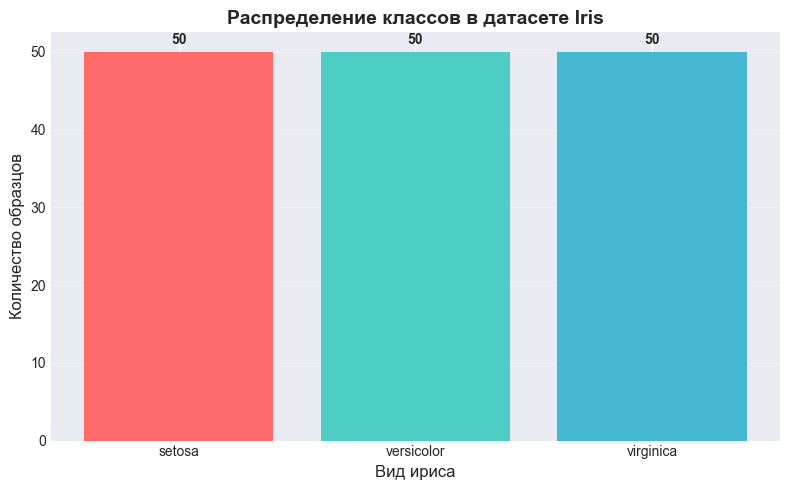

Датасет сбалансирован: каждый класс содержит по 50 объектов


In [4]:
plt.figure(figsize=(8, 5))
species_counts = df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Вид ириса', fontsize=12)
plt.ylabel('Количество образцов', fontsize=12)
plt.title('Распределение классов в датасете Iris', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(species_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Датасет сбалансирован: каждый класс содержит по {species_counts.values[0]} объектов")


### 3.2 Распределение признаков по классам

Box plot (диаграмма размаха) показывает распределение значений признаков для каждого класса:


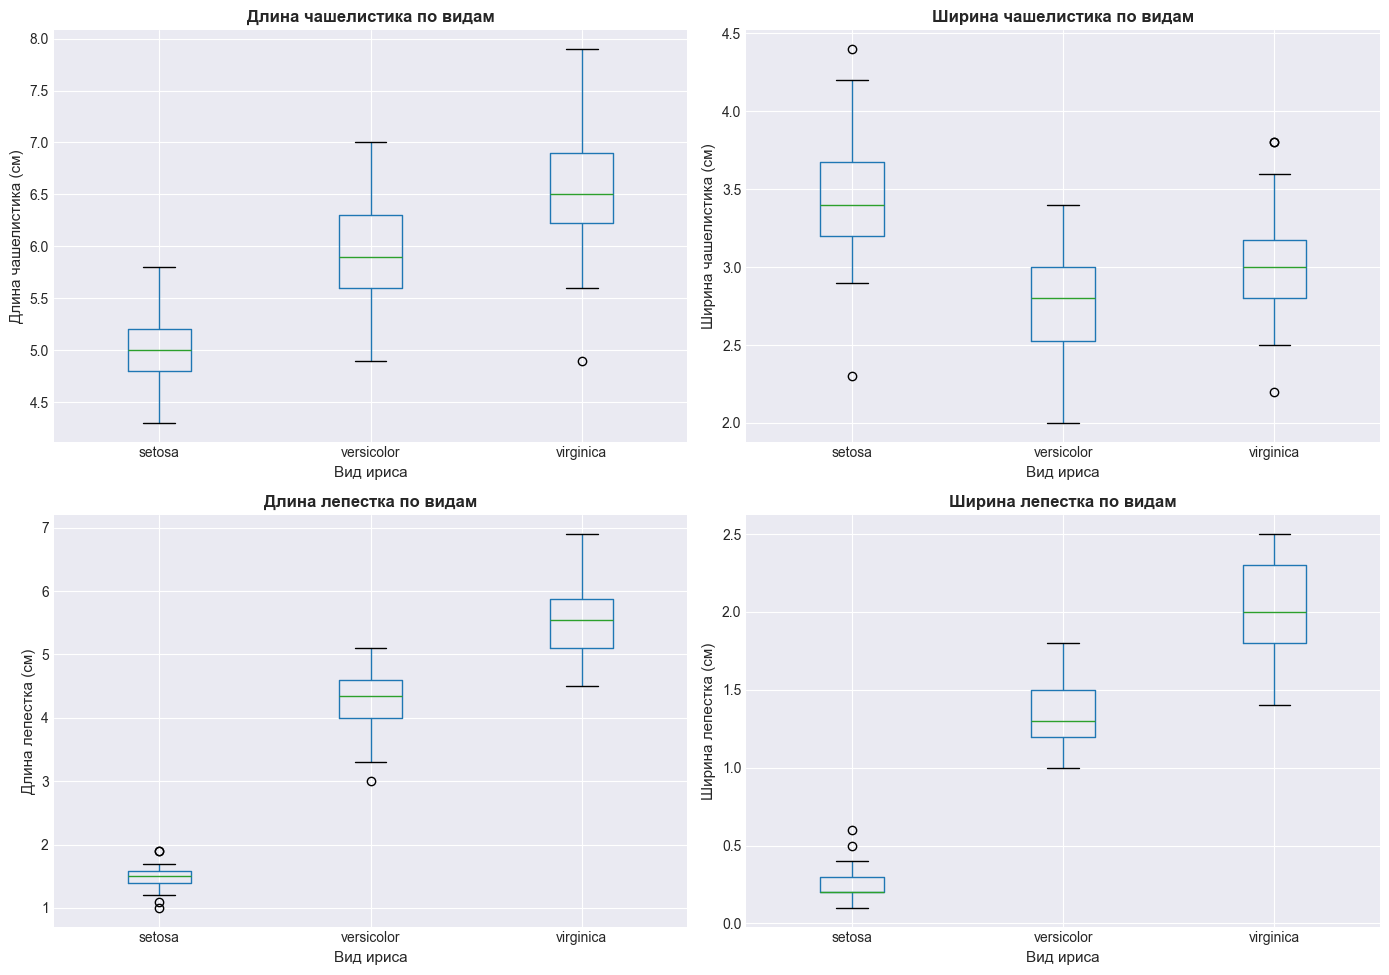

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_names_ru = ['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']

for idx, (feature, feature_ru) in enumerate(zip(feature_names, feature_names_ru)):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=feature, by='species_name', ax=ax)
    ax.set_xlabel('Вид ириса', fontsize=11)
    ax.set_ylabel(f'{feature_ru} (см)', fontsize=11)
    ax.set_title(f'{feature_ru} по видам', fontsize=12, fontweight='bold')
    ax.get_figure().suptitle('')  # Убираем общий заголовок
    
plt.tight_layout()
plt.show()


### 3.3 Попарные графики признаков

Pair plot показывает взаимосвязи между всеми парами признаков. Это помогает увидеть, какие признаки лучше всего разделяют классы:


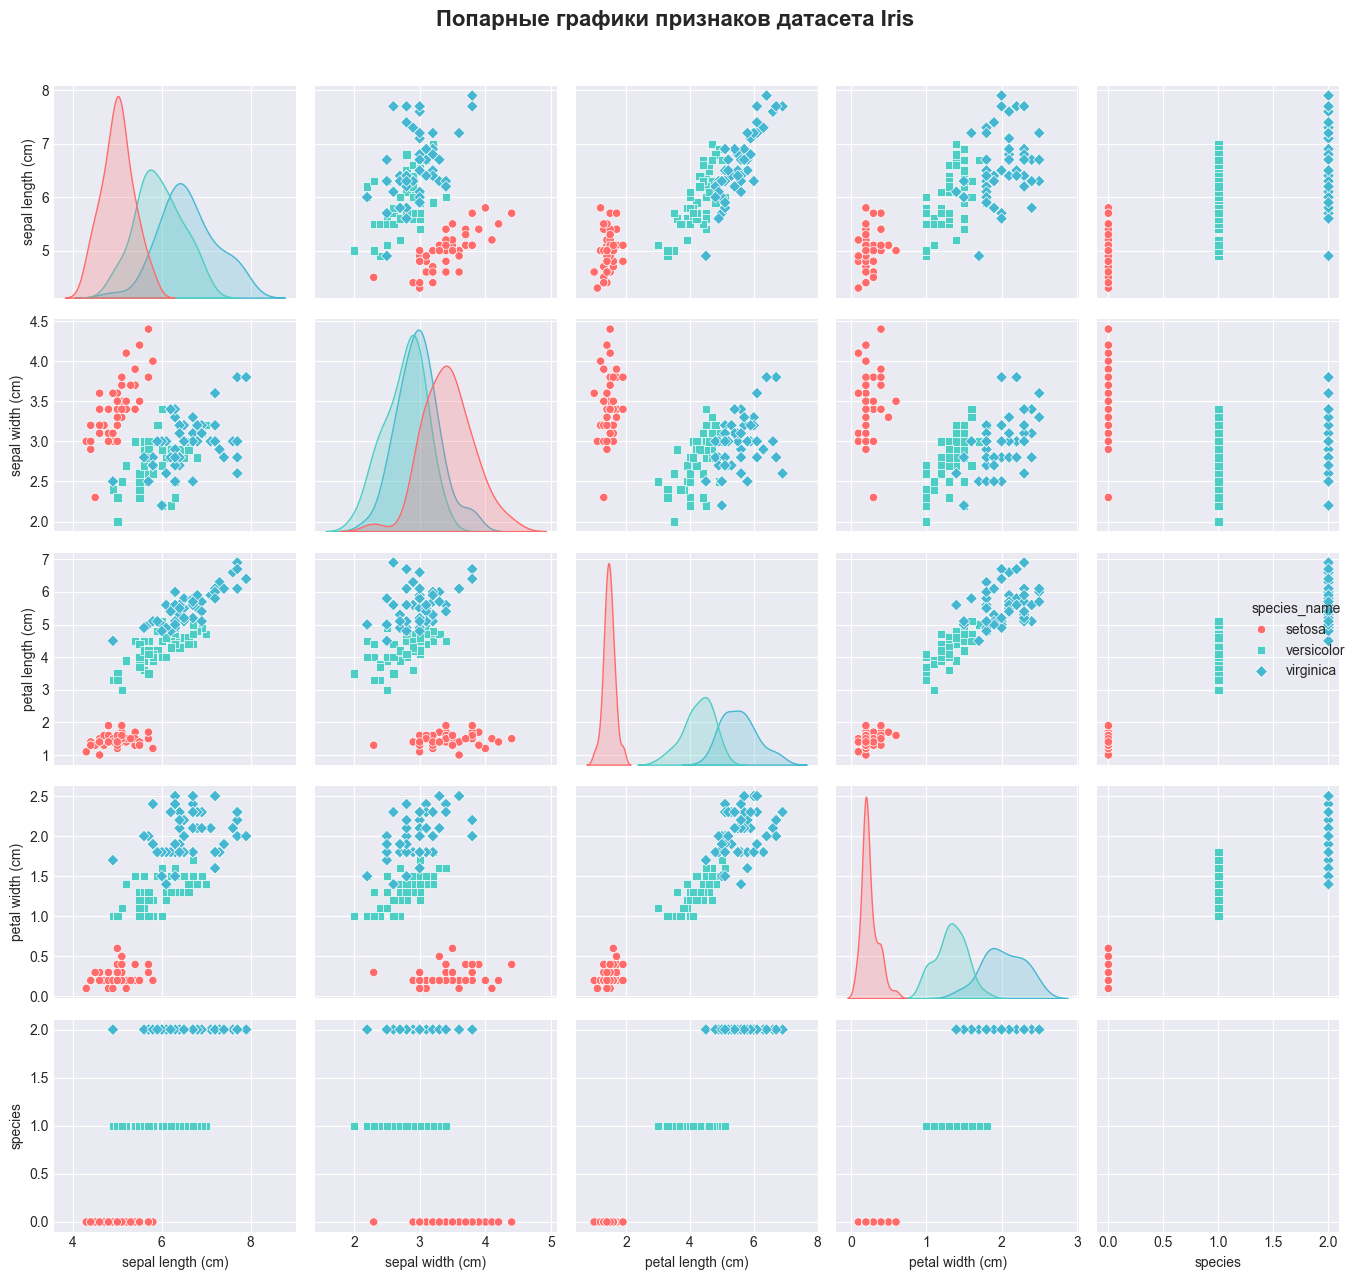

Наблюдение: видно, что вид 'setosa' хорошо отделяется от других,
а 'versicolor' и 'virginica' частично перекрываются.


In [6]:
# Создаем pair plot
sns.pairplot(df, hue='species_name', markers=['o', 's', 'D'], 
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], height=2.5)
plt.suptitle('Попарные графики признаков датасета Iris', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Наблюдение: видно, что вид 'setosa' хорошо отделяется от других,")
print("а 'versicolor' и 'virginica' частично перекрываются.")


### 3.4 Корреляционная матрица

Корреляция показывает, насколько сильно связаны между собой признаки. Значения близкие к 1 или -1 означают сильную связь:


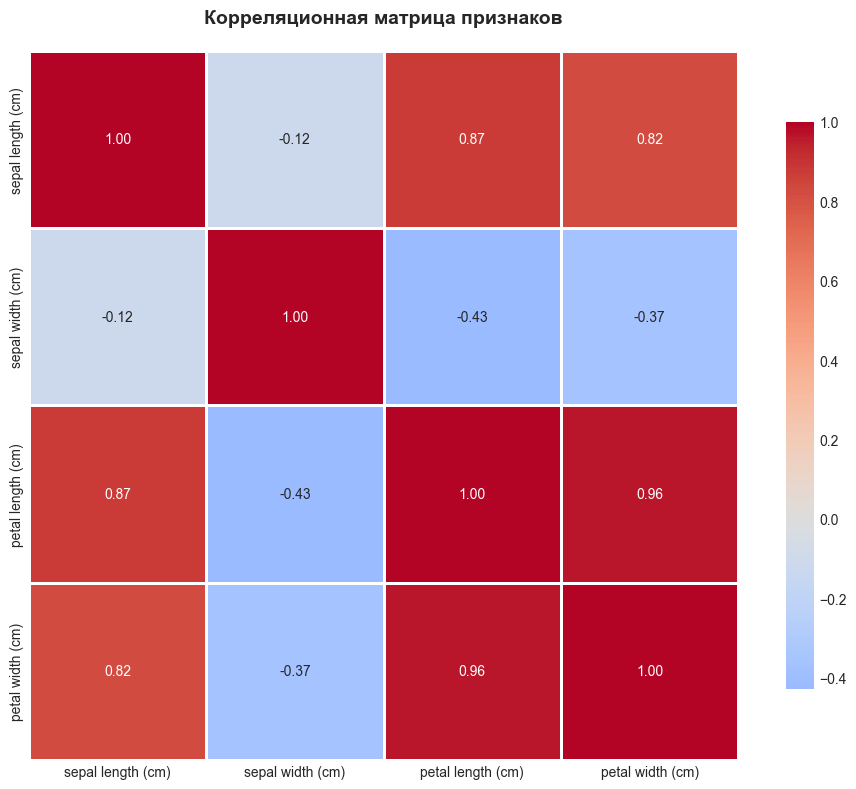

Наблюдение: длина и ширина лепестков сильно коррелируют (0.96),
что логично - большие лепестки обычно и длиннее, и шире.


In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Наблюдение: длина и ширина лепестков сильно коррелируют (0.96),")
print("что логично - большие лепестки обычно и длиннее, и шире.")


## 4. Подготовка данных для обучения

Разделим данные на:
- **Обучающую выборку** (train) - на ней модель будет учиться
- **Тестовую выборку** (test) - на ней проверим качество обучения

Это важно, чтобы проверить, как модель работает на новых, ранее не виденных данных!


In [8]:
# Выделяем признаки (X) и целевую переменную (y)
X = iris.data  # Признаки: измерения цветков
y = iris.target  # Целевая переменная: вид ириса (0, 1, 2)

# Разделяем данные: 70% на обучение, 30% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")
print(f"Количество признаков: {X_train.shape[1]}")


Размер обучающей выборки: 105 объектов
Размер тестовой выборки: 45 объектов
Количество признаков: 4


## 5. Метод K-ближайших соседей (KNN)

### Как работает KNN?

KNN - это очень простой и интуитивный алгоритм:
1. Для нового объекта находим K ближайших соседей из обучающей выборки
2. Смотрим, к какому классу относится большинство из этих соседей
3. Присваиваем новому объекту этот класс

<div style="text-align:center">
    <img src="figures/knn.png" width="500"/>
</div>

### Математика KNN

Расстояние между двумя точками $ x $ и $ x' $ обычно вычисляется по **Евклидовой метрике**:

$$
d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x'_i)^2}
$$

где $ n $ - количество признаков, $ x_i $ и $ x'_i $ - значения $ i $-го признака.

**Предсказание класса:**

$$
\hat{y} = \arg\max_{c} \sum_{i \in N_k(x)} \mathbb{1}[y_i = c]
$$

где $ N_k(x) $ - множество из $ k $ ближайших соседей точки $ x $, а $ \mathbb{1}[y_i = c] $ равно 1, если сосед имеет класс $ c $, и 0 иначе.


### Обучение и тестирование KNN


In [9]:
# Создаем модель KNN с k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred_knn = knn.predict(X_test)

# Оцениваем качество
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность KNN (k=3): {accuracy_knn:.2%}")
print(f"Правильно классифицировано: {int(accuracy_knn * len(y_test))} из {len(y_test)} объектов")


Точность KNN (k=3): 100.00%
Правильно классифицировано: 45 из 45 объектов


### Матрица ошибок (Confusion Matrix)

Матрица ошибок показывает, какие классы модель путает между собой:


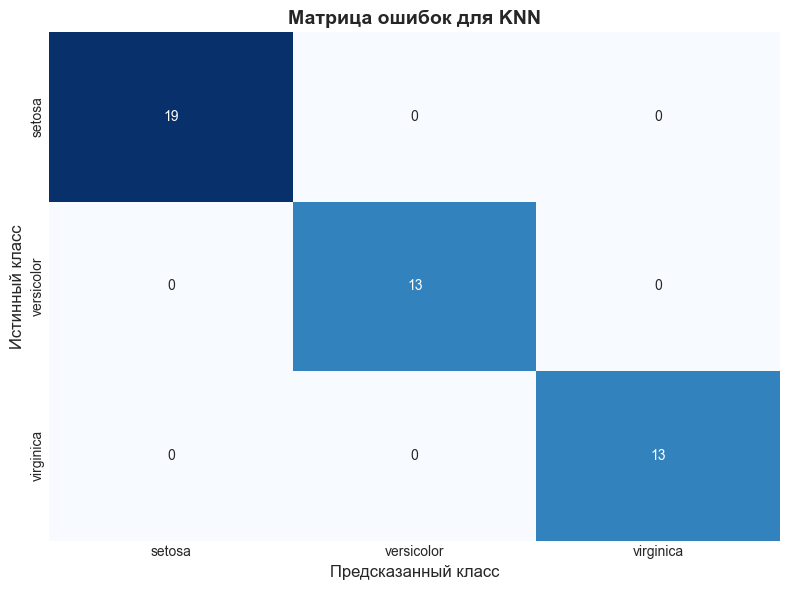


Детальный отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=False)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.title('Матрица ошибок для KNN', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nДетальный отчет по классификации:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))


## 6. Логистическая регрессия

### Как работает логистическая регрессия?

Логистическая регрессия - это линейный классификатор, который:
1. Вычисляет линейную комбинацию признаков
2. Применяет **сигмоидную функцию** для получения вероятности класса
3. Выбирает класс с наибольшей вероятностью


<div style="text-align:center">
    <img src="figures/logistic-regression.png" width="500"/>
</div>

### Математика логистической регрессии

**Линейная комбинация признаков:**

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = w_0 + \sum_{i=1}^{n} w_i x_i
$$

где $ w_i $ - веса (параметры модели), $ x_i $ - признаки.

**Сигмоидная функция:**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Эта функция преобразует любое число в вероятность от 0 до 1.

**Вероятность класса:**

$$
P(y=1|x) = \sigma(w_0 + \sum_{i=1}^{n} w_i x_i)
$$

Для многоклассовой классификации (как в нашем случае) используется **softmax**:

$$
P(y=c|x) = \frac{e^{z_c}}{\sum_{j=1}^{K} e^{z_j}}
$$

где $ K $ - количество классов, $ z_c $ - линейная комбинация для класса $ c $.


### Визуализация сигмоидной функции


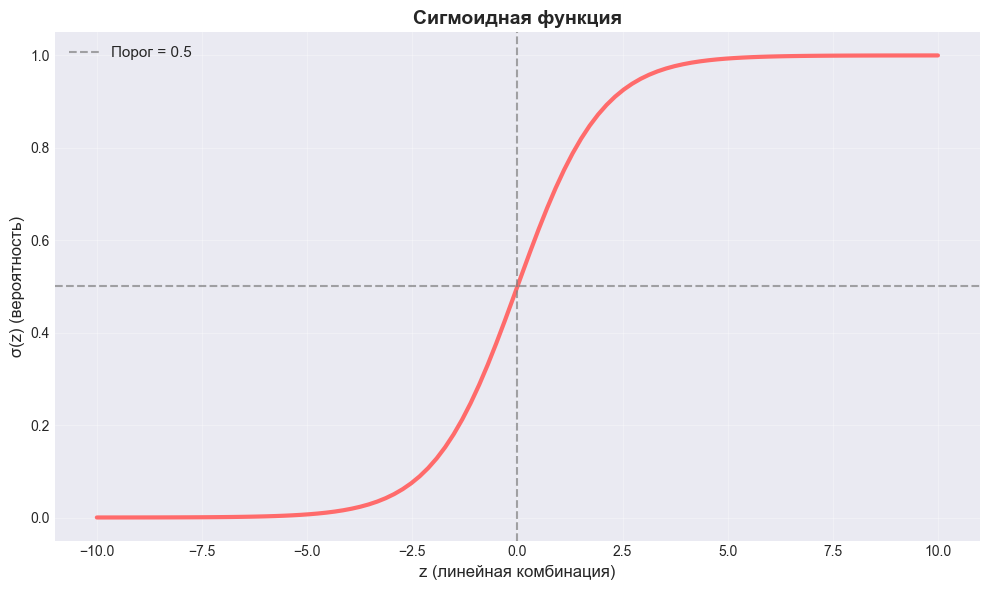

Сигмоидная функция переводит любое число в диапазон [0, 1],
что интерпретируется как вероятность принадлежности к классу.


In [11]:
# Визуализация сигмоидной функции
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, linewidth=3, color='#FF6B6B')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Порог = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('z (линейная комбинация)', fontsize=12)
plt.ylabel('σ(z) (вероятность)', fontsize=12)
plt.title('Сигмоидная функция', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Сигмоидная функция переводит любое число в диапазон [0, 1],")
print("что интерпретируется как вероятность принадлежности к классу.")


### Обучение и тестирование логистической регрессии


<div style="text-align:center">
    <img src="figures/gradient-descent.gif" width="500"/>
</div>

In [12]:
# Создаем модель логистической регрессии
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Обучаем модель
log_reg.fit(X_train, y_train)

# Делаем предсказания
y_pred_lr = log_reg.predict(X_test)

# Оцениваем качество
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Точность логистической регрессии: {accuracy_lr:.2%}")
print(f"Правильно классифицировано: {int(accuracy_lr * len(y_test))} из {len(y_test)} объектов")


Точность логистической регрессии: 100.00%
Правильно классифицировано: 45 из 45 объектов


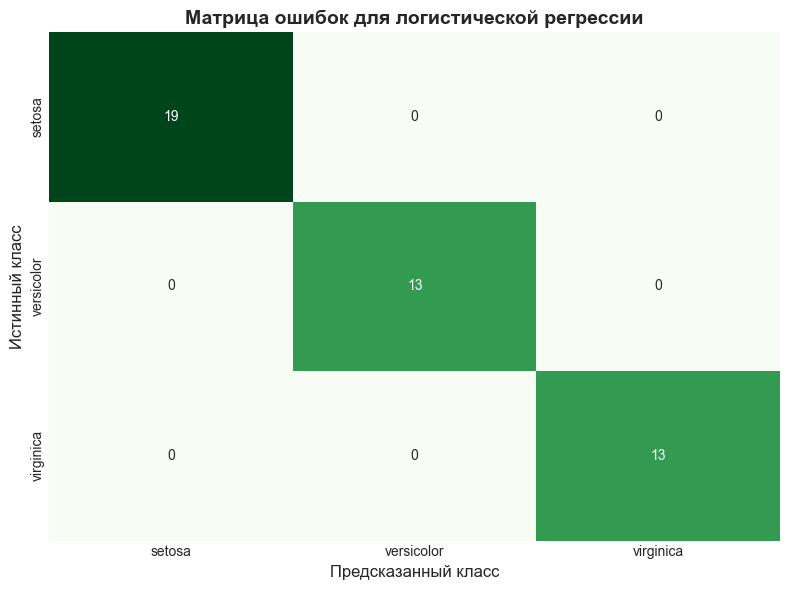


Детальный отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, cbar=False)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.title('Матрица ошибок для логистической регрессии', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nДетальный отчет по классификации:")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))


## 7. Сравнение методов


In [14]:
# Сравнение точности методов

print("\n📊 Итоговое сравнение:")
print(f"KNN (k=3): {accuracy_knn:.2%}")
print(f"Логистическая регрессия: {accuracy_lr:.2%}")



📊 Итоговое сравнение:
KNN (k=3): 100.00%
Логистическая регрессия: 100.00%


## 8. Выводы

### Что мы узнали:

1. **Классификация** - это задача определения класса объекта по его признакам
2. **KNN** - простой метод, основанный на поиске похожих объектов
3. **Логистическая регрессия** - линейный метод, использующий сигмоидную функцию
4. Оба метода показывают отличные результаты на датасете Iris (>95% точности)

### Особенности методов:

| Метод | Плюсы | Минусы |
|-------|-------|--------|
| **KNN** | Простой, не требует обучения | Медленный на больших данных, чувствителен к масштабу признаков |
| **Логистическая регрессия** | Быстрый, интерпретируемый, дает вероятности | Предполагает линейную разделимость классов |

### 🎯 Задания для самостоятельной работы:

1. Попробуйте разные значения K для KNN (например, k=1, k=5, k=7). Как меняется точность?
2. Какие признаки больше всего влияют на классификацию? Посмотрите на веса в логистической регрессии (`log_reg.coef_`)
3. Попробуйте обучить модель только на двух признаках (например, длине и ширине лепестка). Как изменится точность?
4. Что будет, если взять другое соотношение train/test split? Попробуйте 80/20 или 60/40.

### 📚 Полезные термины:

- **Признак (feature)** - измеримая характеристика объекта
- **Класс (class)** - категория, к которой относится объект
- **Обучающая выборка (train set)** - данные для обучения модели
- **Тестовая выборка (test set)** - данные для проверки качества модели
- **Точность (accuracy)** - доля правильных предсказаний
- **Матрица ошибок (confusion matrix)** - таблица ошибок классификации
